In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import pandas as pd
import uproot

In [2]:
def set_chain(df,i):
    return ((df['Chain']==i)
            & (df['Phase']==1)
            )

def set_run(df):
    return ((df['Phase']==1))

# Read the chains

BAT is set of C++ libraries implementing the Metropolis-Hastings MCMC algorithm, required for the sampling of the parameter space of the fit.

It's main output are MCMC chains and here there are some lines of code to a starting handling of such chains.

# association

In [7]:
output_filename = './output_association/association_golden_input.txt_0_mcmc.root'
mcmc = uproot.open(output_filename)
variables = ['L','x','y']
default = ['Chain','Iteration','Phase']
df = mcmc[mcmc.keys()[1]].arrays(default + variables,library='pd')

In [8]:
df

,Chain,Iteration,Phase,L,x,y
0,0,1,-1,78.611598,15.944959,12.155344
1,1,1,-1,13059.597984,2.189828,19.241643
2,2,1,-1,21969.433045,1.844249,7.108542
3,3,1,-1,1629.049005,22.660267,4.599320
4,4,1,-1,13668.907303,5.086374,31.275370
...,...,...,...,...,...,...
83995,1,10000,1,7782.969638,23.073971,4.073758
83996,2,10000,1,7367.069740,21.690183,4.603086
83997,3,10000,1,7303.788357,23.762454,5.251276
83998,4,10000,1,7360.087745,22.656209,6.548907


## Plot the chains

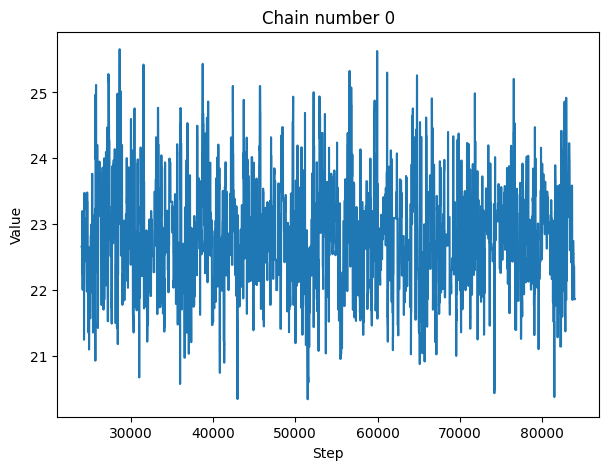

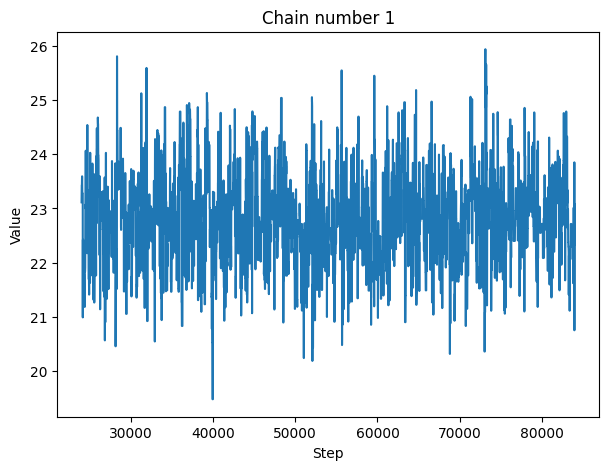

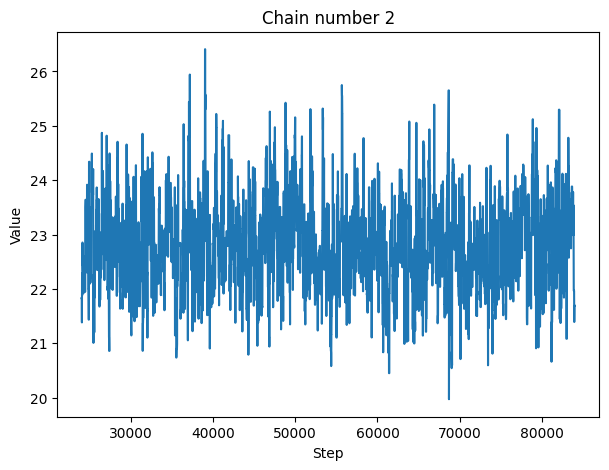

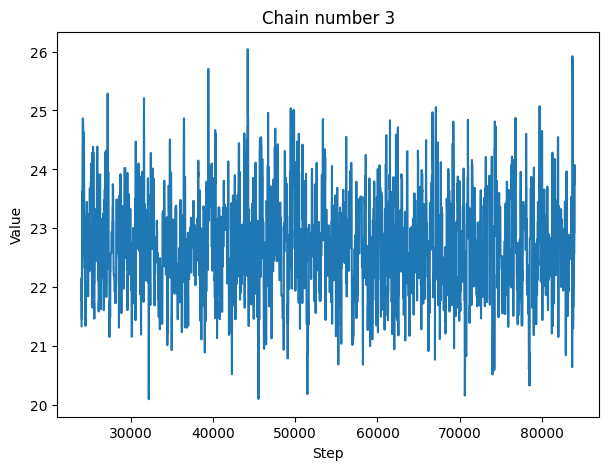

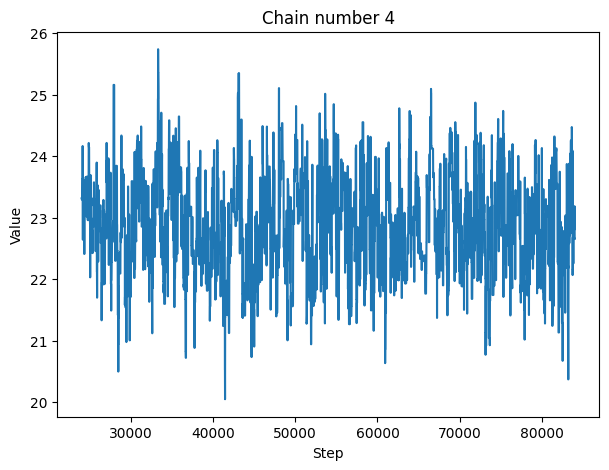

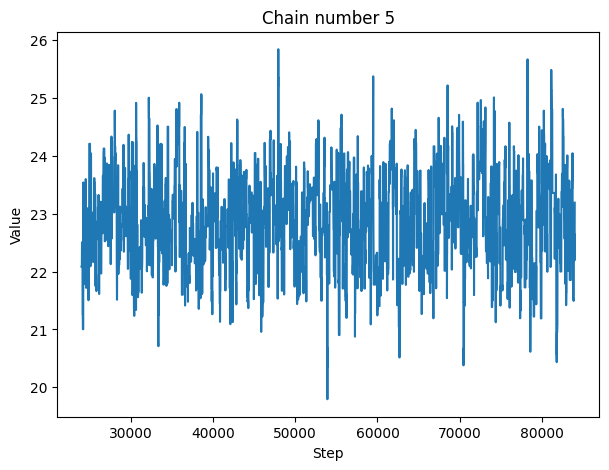

In [19]:
variable = 'x'
for ch in df['Chain'].unique():
    plt.figure(figsize=(7,5))
    plt.plot(df[set_chain(df,ch)][variable])
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title('Chain number %d'%ch)
    plt.show()

## Posteriors and best fit values

In [22]:
for v in range(len(variables)):
    if (v==0):
        samples = df[set_run(df)][variables[v]]
    else:
        samples = np.vstack([samples,df[set_run(df)][variables[v]]])

samples = np.array(np.transpose(np.vstack(samples)))


A corner plot is an easy way to plot the probability distribution of the fitted variables and their mutual correlation. Frequentist fits usually returns you just a number, here you have direct access to the entire posterior distribution

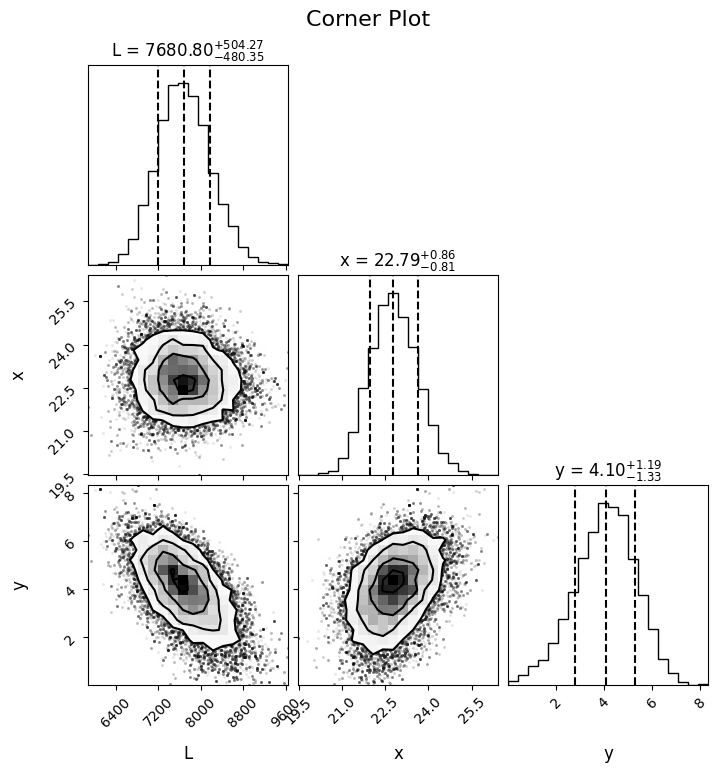

In [23]:
figure = corner.corner(samples,
                       labels=variables,
                       show_titles=True,quantiles=[0.16, 0.5, 0.84],
                       title_kwargs={"fontsize": 12},label_kwargs={"fontsize": 12})
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.suptitle("Corner Plot", fontsize=16, y=1.02)
# plt.savefig('./corner_plot.pdf',format='pdf')
plt.show()

If you need the best values of the fit, you just take the means of the distribution. As uncertainty of such values, the standard deviation

In [27]:
print('=== Best values of the fit===')
for var in variables:
    print('%s: (%.2e +- %.2e)'%(var,np.mean( df[set_run(df)][var]),np.std( df[set_run(df)][var])))

=== Best values of the fit===
L: (7.69e+03 +- 5.00e+02)
x: (2.28e+01 +- 8.31e-01)
y: (4.03e+00 +- 1.27e+00)


# PMTcalibration

In [29]:
output_filename = './output_PMTcalibration/PMTcalibration_cal_test_v3.txt_mcmc.root'
mcmc = uproot.open(output_filename)
variables = ['c1','c2','c3','c4']
default = ['Chain','Iteration','Phase']
df = mcmc[mcmc.keys()[1]].arrays(default + variables,library='pd')

In [30]:
df

,Chain,Iteration,Phase,c1,c2,c3,c4
0,0,1,-1,8.019941,5.122740,2.685773,9.108180
1,1,1,-1,3.256654,0.665154,5.001670,3.065111
2,2,1,-1,8.801257,7.200109,3.314989,3.517566
3,3,1,-1,4.493585,9.059148,8.155222,0.595242
4,4,1,-1,5.191643,0.506401,8.419892,3.131823
...,...,...,...,...,...,...,...
1319995,7,100000,1,1.905037,3.013739,3.504863,2.417179
1319996,8,100000,1,1.883355,3.028540,3.494632,2.380272
1319997,9,100000,1,1.921271,3.033704,3.501129,2.420480
1319998,10,100000,1,1.896368,3.009505,3.499423,2.409184


## Plot the chains

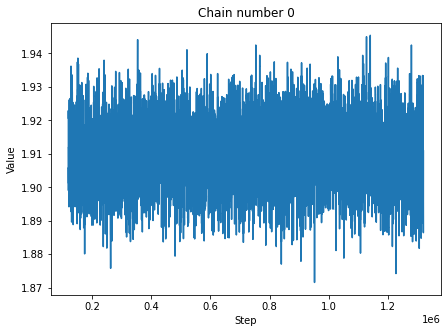

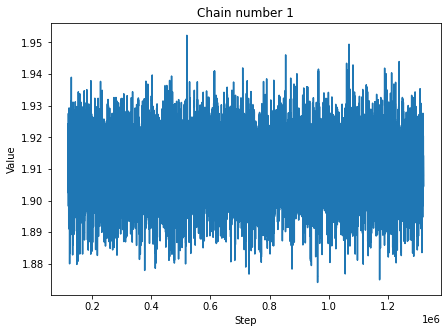

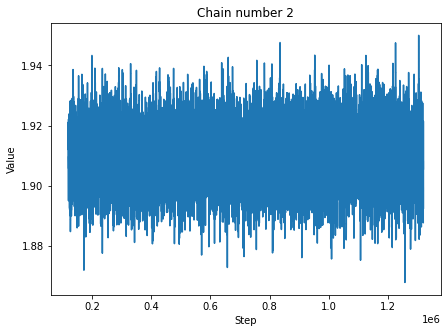

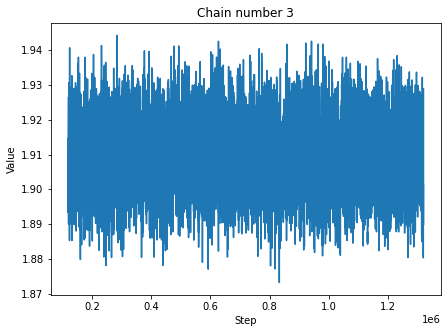

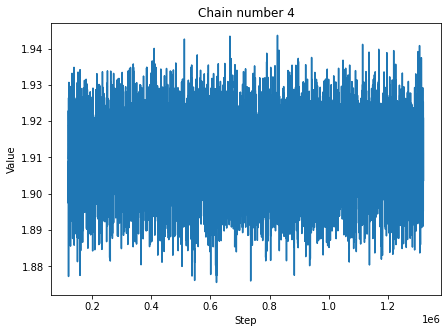

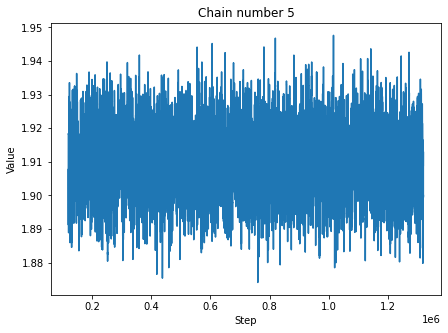

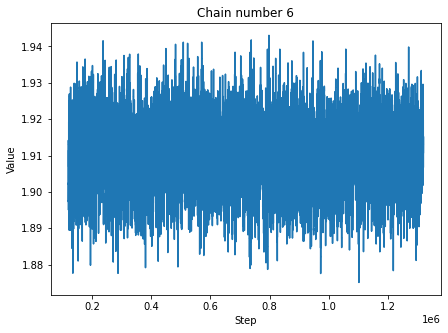

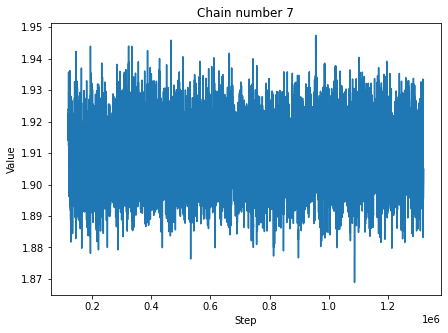

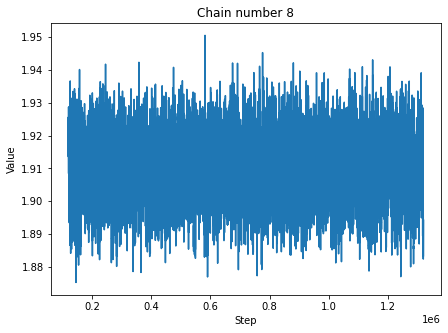

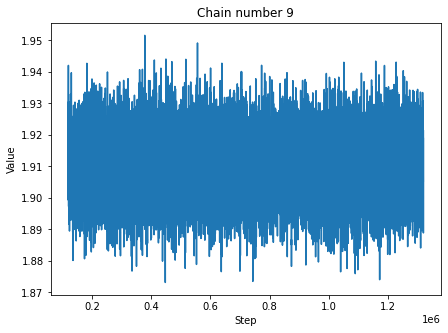

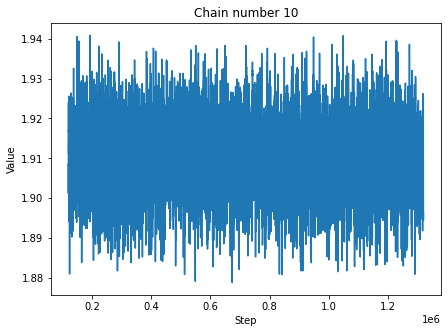

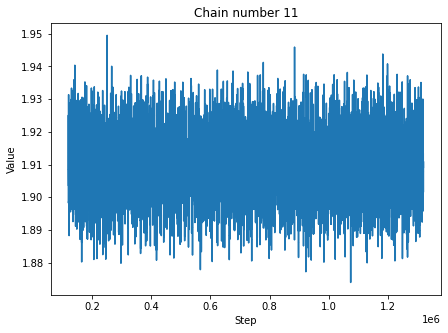

In [31]:
variable = 'c1'
for ch in df['Chain'].unique():
    plt.figure(figsize=(7,5))
    plt.plot(df[set_chain(df,ch)][variable])
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title('Chain number %d'%ch)
    plt.show()

## Posteriors and best fit values

In [32]:
for v in range(len(variables)):
    if (v==0):
        samples = df[set_run(df)][variables[v]]
    else:
        samples = np.vstack([samples,df[set_run(df)][variables[v]]])

samples = np.array(np.transpose(np.vstack(samples)))


A corner plot is an easy way to plot the probability distribution of the fitted variables and their mutual correlation. Frequentist fits usually returns you just a number, here you have direct access to the entire posterior distribution

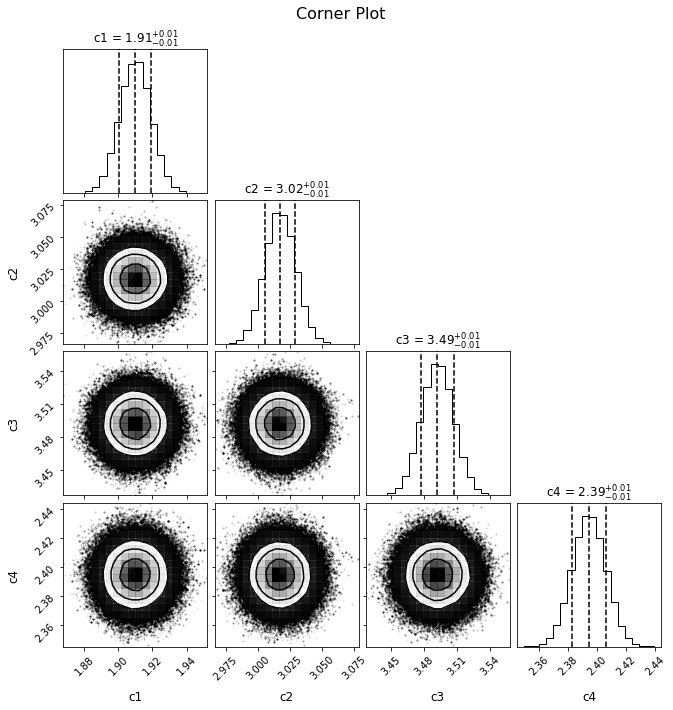

In [34]:
figure = corner.corner(samples,
                       labels=variables,
                       show_titles=True,quantiles=[0.16, 0.5, 0.84],
                       title_kwargs={"fontsize": 12},label_kwargs={"fontsize": 12})
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.suptitle("Corner Plot", fontsize=16, y=1.02)
# plt.savefig('./corner_plot.pdf',format='pdf')
plt.show()

If you need the best values of the fit, you just take the means of the distribution. As uncertainty of such values, the standard deviation

In [27]:
print('=== Best values of the fit===')
for var in variables:
    print('%s: (%.2e +- %.2e)'%(var,np.mean( df[set_run(df)][var]),np.std( df[set_run(df)][var])))

=== Best values of the fit===
L: (7.69e+03 +- 5.00e+02)
x: (2.28e+01 +- 8.31e-01)
y: (4.03e+00 +- 1.27e+00)
